In [2]:
!pip install --disable-pip-version-check -q sagemaker==2.35.0
!pip install --disable-pip-version-check -q pandas==1.1.4
!pip install --disable-pip-version-check -q awswrangler==2.7.0
!pip install --disable-pip-version-check -q numpy==1.18.5
!pip install --disable-pip-version-check -q seaborn==0.11.0
!pip install --disable-pip-version-check -q matplotlib===3.3.3

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils 

In [3]:
!aws s3 ls s3://dlai-practical-data-science/data/raw/

2021-04-30 02:21:06    8457214 womens_clothing_ecommerce_reviews.csv


In [4]:
!aws s3 cp s3://dlai-practical-data-science/data/raw/womens_clothing_ecommerce_reviews.csv ./womens_clothing_ecommerce_reviews.csv

download: s3://dlai-practical-data-science/data/raw/womens_clothing_ecommerce_reviews.csv to ./womens_clothing_ecommerce_reviews.csv


In [5]:
import pandas as pd 
import csv 
df = pd.read_csv('./womens_clothing_ecommerce_reviews.csv',index_col=0)
df.shape

(23486, 10)

In [6]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,847,33,"Cute, crisp shirt",If this product was in petite i would get the...,4,1,2,General,Tops,Blouses
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,I love love love this jumpsuit. it's fun fl...,5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,It reminds me of maternity clothes. soft stre...,3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through",This fit well but the top was very see throug...,3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [7]:
df_transformed = df.rename(columns={'Review Text' : 'review_body','Rating':'star_rating','Class Name':'product_category'})
df_transformed.drop(columns=['Clothing ID', 'Age', 'Title', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name'],inplace=True)
df_transformed.dropna(inplace=True)
df_transformed.shape 

(22628, 3)

In [8]:
df_transformed.head()

,review_body,star_rating,product_category
0,If this product was in petite i would get the...,4,Blouses
1,Love this dress! it's sooo pretty. i happene...,5,Dresses
2,I had such high hopes for this dress and reall...,3,Dresses
3,I love love love this jumpsuit. it's fun fl...,5,Pants
4,This shirt is very flattering to all due to th...,5,Blouses


In [9]:
def to_sentiment(star_rating):
    if star_rating in {1, 2}: 
        return -1 
    if star_rating == 3:      
        return 0
    if star_rating in {4, 5}: 
        return 1

df_transformed['sentiment'] = df_transformed['star_rating'].apply(lambda star_rating: 
    to_sentiment(star_rating=star_rating) 
)

df_transformed.drop(columns=['star_rating'],
                    inplace=True)

df_transformed = df_transformed.groupby('product_category').filter(lambda rev : len(rev) > 10)[['sentiment', 'review_body', 'product_category']]

df_transformed.shape

(22626, 3)

In [10]:
df_transformed 

,sentiment,review_body,product_category
0,1,If this product was in petite i would get the...,Blouses
1,1,Love this dress! it's sooo pretty. i happene...,Dresses
2,0,I had such high hopes for this dress and reall...,Dresses
3,1,I love love love this jumpsuit. it's fun fl...,Pants
4,1,This shirt is very flattering to all due to th...,Blouses
...,...,...,...
23481,1,I was very happy to snag this dress at such a ...,Dresses
23482,0,It reminds me of maternity clothes. soft stre...,Knits
23483,0,This fit well but the top was very see throug...,Dresses
23484,0,I bought this dress for a wedding i have this ...,Dresses


In [11]:
df_transformed.to_csv('cloth.csv',index=False)

In [12]:
!head -n 5 cloth.csv

sentiment,review_body,product_category
1,If this product was in petite  i would get the petite. the regular is a little long on me but a tailor can do a simple fix on that.     fits nicely! i'm 5'4  130lb and pregnant so i bough t medium to grow into.     the tie can be front or back so provides for some nice flexibility on form fitting.,Blouses
1,"Love this dress!  it's sooo pretty.  i happened to find it in a store  and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8"".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.",Dresses
0,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium  which was just ok. overall  the top half was comfortable and fit nicely  but the bott

In [13]:
import boto3
import botocore 
import sagemaker 
import numpy as np 
config = botocore.config.Config(user_agent_extra='dlai-pds/c1/w1')
sm = boto3.client(service_name='sagemaker',config=config)
sess = sagemaker.Session(sagemaker_client=sm)
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = sess.boto_region_name
account_id = sess.account_id
print('S3 Bucket: {}'.format(bucket))
print('Region: {}'.format(region))
print('Account ID: {}'.format(account_id))

S3 Bucket: sagemaker-us-east-1-496902025774
Region: us-east-1
Account ID: <bound method Session.account_id of <sagemaker.session.Session object at 0x7f83a540cf50>>


In [14]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://s3.console.aws.amazon.com/s3/home?region={}#">Amazon S3 buckets</a></b>'.format(region)))

In [15]:
!aws s3 cp cloth.csv s3://$bucket/data/transformed/womens_clothing_ecommerce_reviews_transformed.csv

upload: ./cloth.csv to s3://sagemaker-us-east-1-496902025774/data/transformed/womens_clothing_ecommerce_reviews_transformed.csv


In [16]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://s3.console.aws.amazon.com/s3/home?region={}#">Amazon S3 buckets</a></b>'.format(region)))

In [17]:
import awswrangler as wr 

In [18]:
wr.catalog.create_database(name="dsonaws_deep_learning",exist_ok=True)

In [19]:
dbs = wr.catalog.get_databases()
for db in dbs:
    print("Database name: ",db)
    print("Database name: ",db['Name'])


Database name:  {'Name': 'dsonaws_deep_learning', 'CreateTime': datetime.datetime(2021, 9, 3, 9, 2, 11, tzinfo=tzlocal()), 'CreateTableDefaultPermissions': [{'Principal': {'DataLakePrincipalIdentifier': 'IAM_ALLOWED_PRINCIPALS'}, 'Permissions': ['ALL']}], 'CatalogId': '496902025774'}
Database name:  dsonaws_deep_learning


In [20]:
from IPython.core.display import display, HTML
display(HTML('<b>Review <a target="top" href="https://console.aws.amazon.com/glue/home?region={}#catalog:tab=databases">AWS Glue Databases</a></b>'.format(region)))

In [21]:
wr.catalog.create_csv_table(
   database='dsonaws_deep_learning',
   path='s3://{}/data/transformed/'.format(bucket),
   table="reviews",
   columns_types={
       'sentiment':'int',
       'review_body':'string',
       'product_category':'string'
   },
   mode='overwrite',
   skip_header_line_count=1,
   sep=','
) 

In [22]:
from IPython.core.display import display, HTML
display(HTML('<b>Review <a target="top" href="https://console.aws.amazon.com/glue/home?region={}#catalog:tab=databases">AWS Glue Databases</a></b>'.format(region)))

In [23]:
table = wr.catalog.table(database="dsonaws_deep_learning",table="reviews")
table

,Column Name,Type,Partition,Comment
0,sentiment,int,False,
1,review_body,string,False,
2,product_category,string,False,


In [24]:
wr.athena.create_athena_bucket()

's3://aws-athena-query-results-496902025774-us-east-1/'

In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [26]:
database_name = 'dsonaws_deep_learning'
table_name = 'reviews'

In [27]:
sns.set_style = 'seaborn_whitegrid'
sns.set(rc={"font.style":"normal",
            "axes.facecolor":"white",
            'grid.color': '.8',
            'grid.linestyle': '-',
            "figure.facecolor":"white",
            "figure.titlesize":20,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":True,
            'axes.labelsize':10,
            'xtick.labelsize':10,
            'font.size':10,
            'ytick.labelsize':10})

In [28]:
statement_count_by_sentiment = """
SELECT sentiment, COUNT(sentiment) AS count_sentiment
FROM reviews
GROUP BY sentiment
ORDER BY sentiment 
""" 

In [29]:
df_count_by_sentiment = wr.athena.read_sql_query(
    sql=statement_count_by_sentiment,
    database=database_name
)

print(df_count_by_sentiment)

   sentiment  count_sentiment
0         -1             2370
1          0             2823
2          1            17433


<AxesSubplot:xlabel='sentiment'>

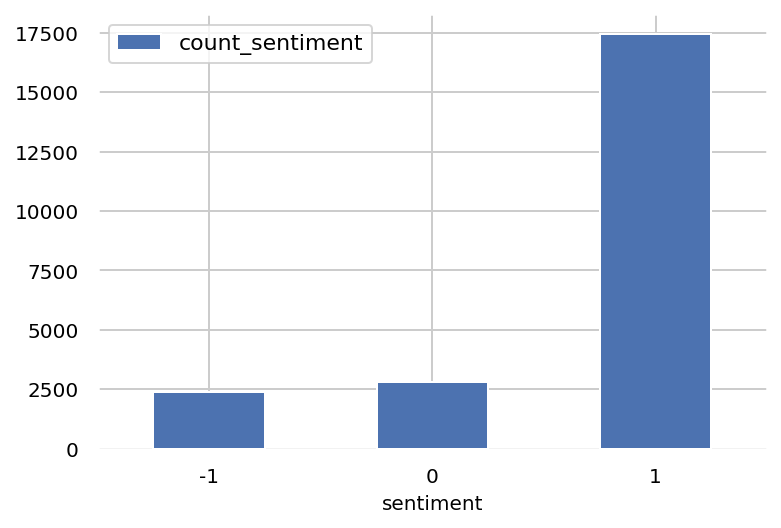

In [30]:
df_count_by_sentiment.plot(kind='bar', x='sentiment', y='count_sentiment', rot=0)

In [31]:
statement_count_by_category = """
SELECT product_category, COUNT(sentiment) AS count_sentiment
FROM reviews
GROUP BY product_category
ORDER BY count_sentiment DESC
""" 

In [32]:
df_count_by_category = wr.athena.read_sql_query(
sql = statement_count_by_category,
database = database_name)
print(df_count_by_category)

   product_category  count_sentiment
0           Dresses             6145
1             Knits             4626
2           Blouses             2983
3          Sweaters             1380
4             Pants             1350
5             Jeans             1104
6        Fine gauge             1059
7            Skirts              903
8           Jackets              683
9            Lounge              669
10             Swim              332
11        Outerwear              319
12           Shorts              304
13            Sleep              214
14          Legwear              158
15        Intimates              147
16         Layering              132
17            Trend              118


In [33]:
statement_avg_by_category = """
SELECT product_category, AVG(sentiment) AS avg_sentiment
FROM {} 
GROUP BY product_category 
ORDER BY avg_sentiment DESC
""".format(table_name)

In [34]:
%%time
df_avg_by_category = wr.athena.read_sql_query(
    sql=statement_avg_by_category,
    database=database_name
)

CPU times: user 277 ms, sys: 15.4 ms, total: 292 ms
Wall time: 3.26 s


In [35]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://s3.console.aws.amazon.com/s3/buckets/aws-athena-query-results-{}-{}?region={}">Amazon S3 buckets</a></b>'.format(account_id, region, region)))

In [36]:
df_avg_by_category

,product_category,avg_sentiment
0,Layering,0.780303
1,Jeans,0.746377
2,Lounge,0.745889
3,Sleep,0.710280
4,Shorts,0.707237
5,Pants,0.705185
6,Intimates,0.700680
7,Jackets,0.699854
8,Skirts,0.696567
9,Legwear,0.696203


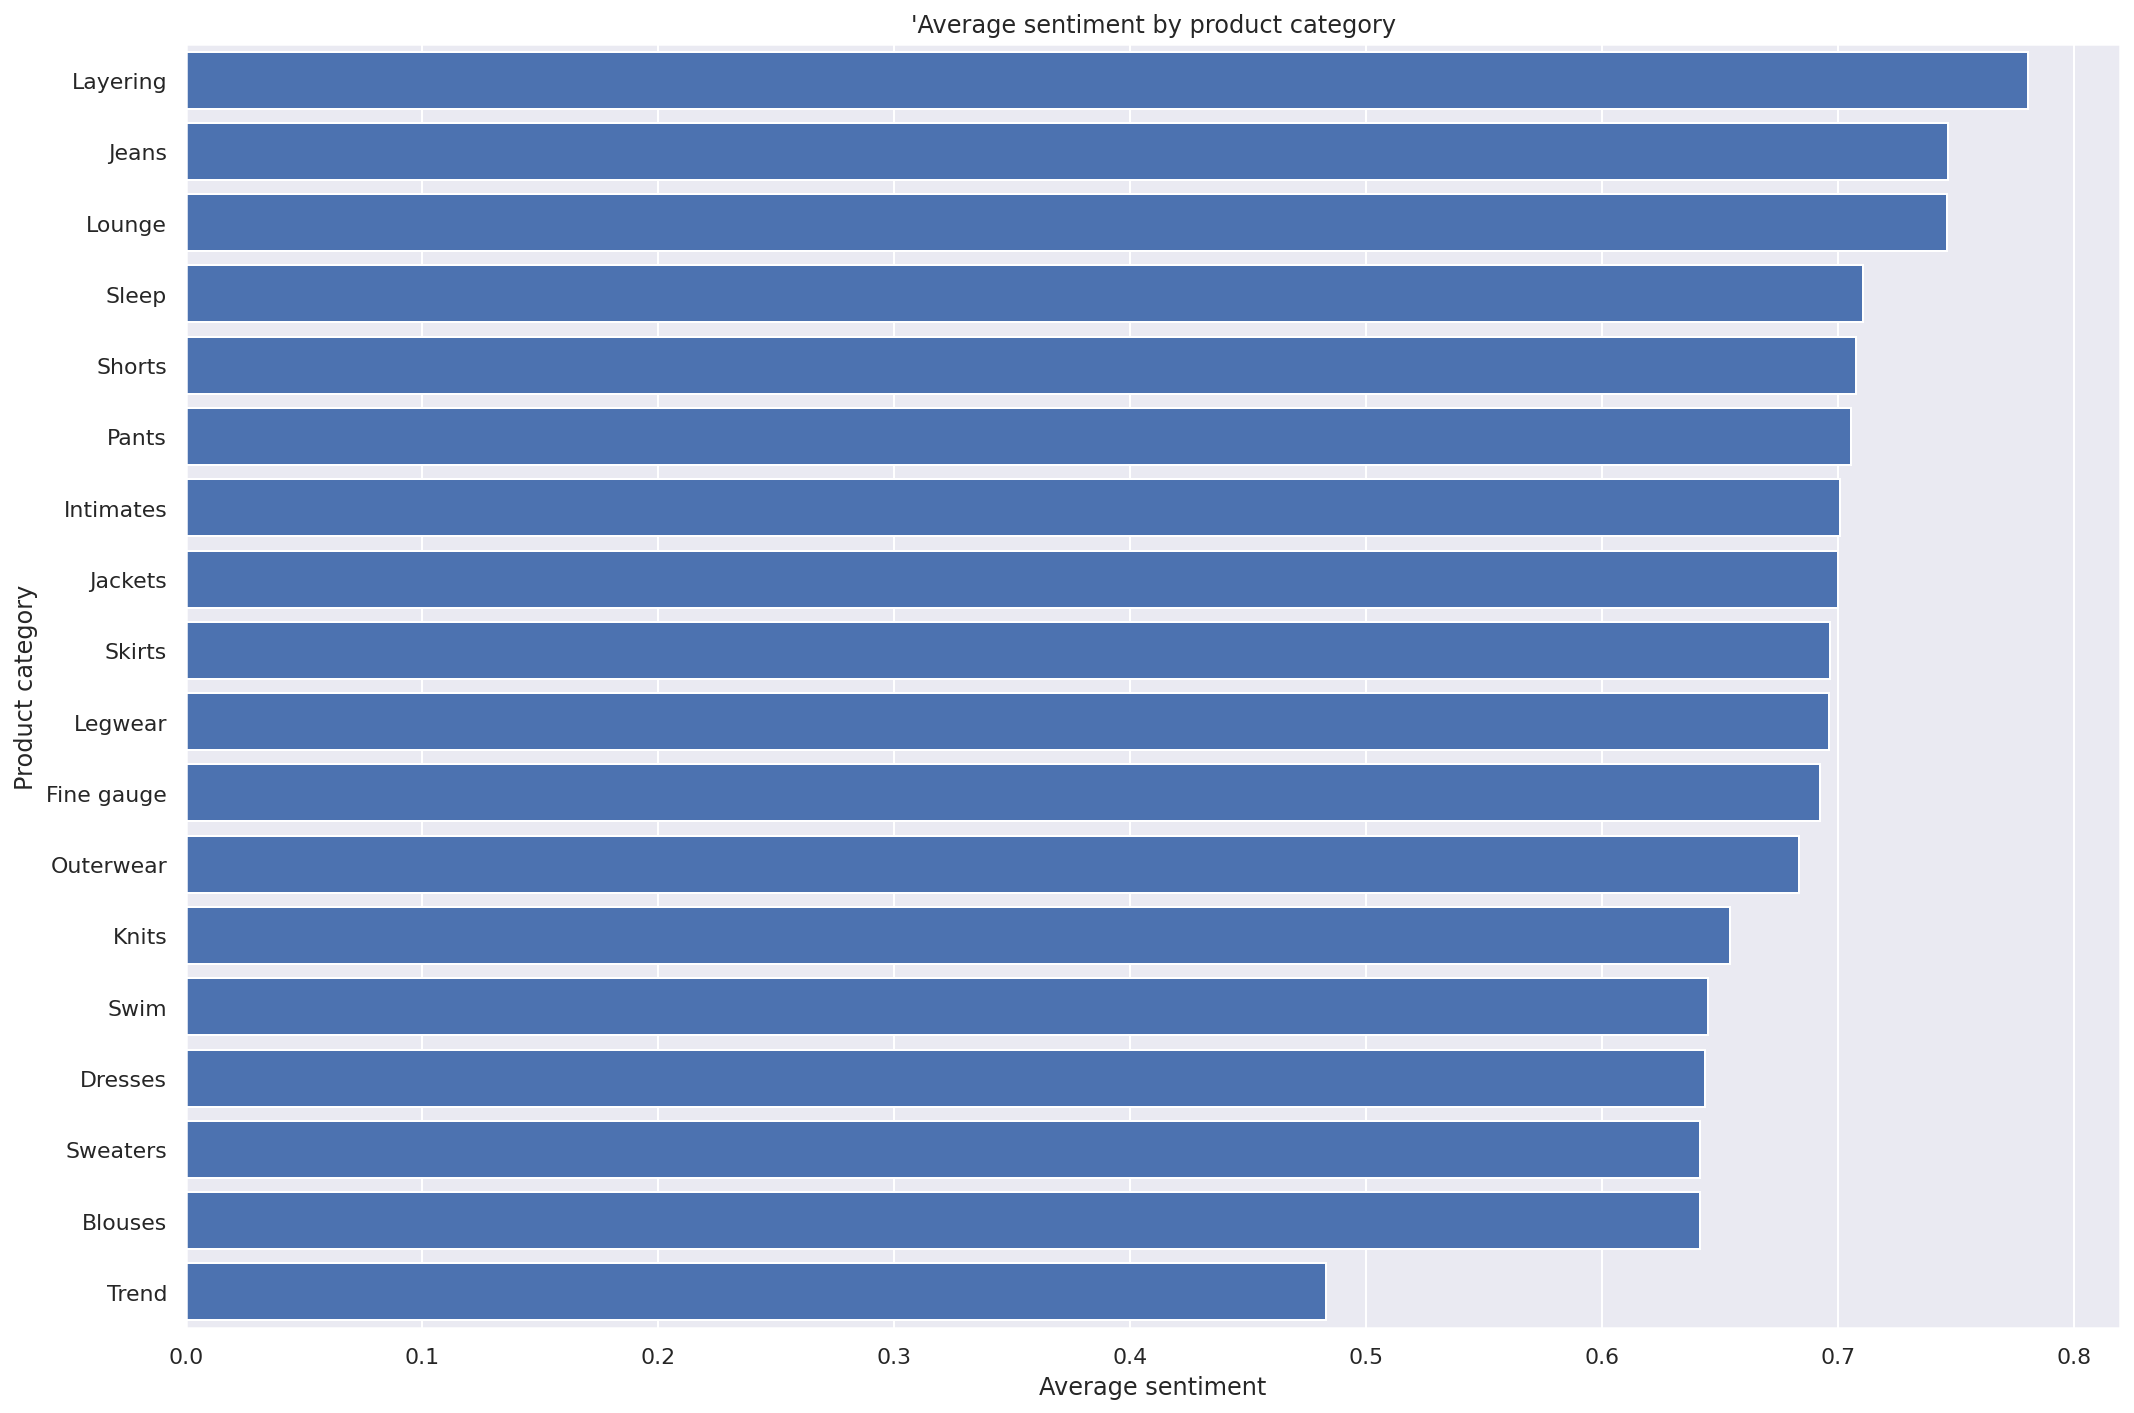

In [45]:
barplot = sns.barplot(
    data =df_avg_by_category,
    y = "product_category",
    x = "avg_sentiment",
    color="b",
    saturation=1)
sns.set(rc={'figure.figsize':(15.0,10.0)})
plt.title("'Average sentiment by product category")
plt.xlabel("Average sentiment")
plt.ylabel("Product category")
plt.tight_layout()
plt.savefig('avg_sentiment_per_category.png', dpi=300)
plt.show(barplot)

In [46]:
sess.upload_data(path="avg_sentiment_per_category.png",bucket=bucket,key_prefix="images")

's3://sagemaker-us-east-1-496902025774/images/avg_sentiment_per_category.png'

In [47]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://s3.console.aws.amazon.com/s3/home?region={}">Amazon S3 buckets</a></b>'.format(region)))

In [39]:
statement_count_by_category_desc = """
SELECT product_category, COUNT(*) AS count_reviews 
FROM {}
GROUP BY product_category 
ORDER BY count_reviews DESC
""".format(table_name)
print(statement_count_by_category_desc)


SELECT product_category, COUNT(*) AS count_reviews 
FROM reviews
GROUP BY product_category 
ORDER BY count_reviews DESC



In [40]:
%%time
df_count_by_category_desc = wr.athena.read_sql_query(
    sql=statement_count_by_category_desc,
    database=database_name
)

CPU times: user 395 ms, sys: 22 ms, total: 417 ms
Wall time: 3.29 s


In [41]:
max_sentiment = df_count_by_category_desc['count_reviews'].max()
print('Highest number of reviews (in a single category): {}'.format(max_sentiment))

Highest number of reviews (in a single category): 6145


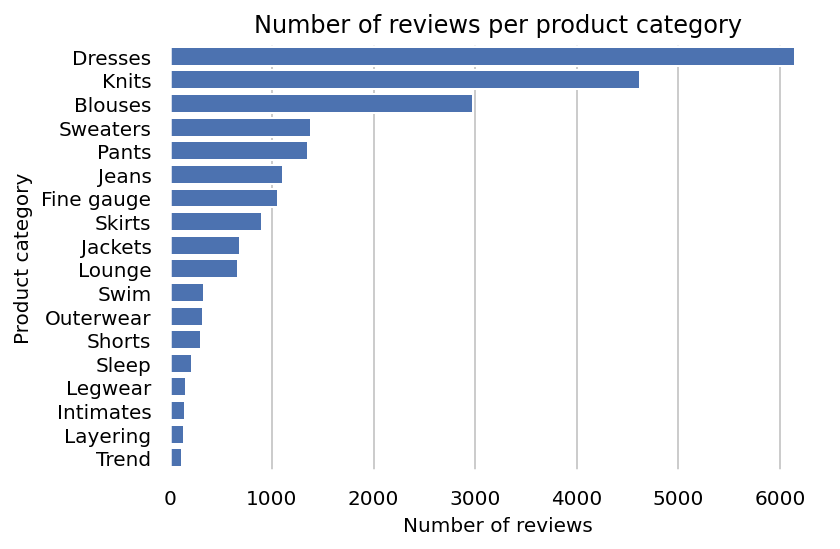

In [42]:
barplot = sns.barplot(
    data =df_count_by_category_desc,
    y = "product_category",
    x = "count_reviews",
    color="b",
    saturation=1)
sns.set(rc={'figure.figsize':(15.0,10.0)})
plt.title("Number of reviews per product category")
plt.xlabel("Number of reviews")
plt.ylabel("Product category")
plt.tight_layout()
plt.savefig('num_reviews_per_category.png', dpi=300)
plt.show(barplot)

In [48]:
sess.upload_data(path='num_reviews_per_category.png', bucket=bucket, key_prefix="images")

's3://sagemaker-us-east-1-496902025774/images/num_reviews_per_category.png'

In [49]:
statement_count_by_category_and_sentiment = """
SELECT product_category,
         sentiment,
         COUNT(*) AS count_reviews
FROM {}
GROUP BY  product_category, sentiment
ORDER BY  product_category ASC, sentiment DESC, count_reviews
""".format(table_name)

print(statement_count_by_category_and_sentiment)


SELECT product_category,
         sentiment,
         COUNT(*) AS count_reviews
FROM reviews
GROUP BY  product_category, sentiment
ORDER BY  product_category ASC, sentiment DESC, count_reviews



In [50]:
df_count_by_category_and_sentiment = wr.athena.read_sql_query(
    sql=statement_count_by_category_and_sentiment,
    database=database_name
)
print(df_count_by_category_and_sentiment)

   product_category  sentiment  count_reviews
0           Blouses          1           2256
1           Blouses          0            384
2           Blouses         -1            343
3           Dresses          1           4634
4           Dresses          0            830
5           Dresses         -1            681
6        Fine gauge          1            837
7        Fine gauge          0            118
8        Fine gauge         -1            104
9         Intimates          1            117
10        Intimates          0             16
11        Intimates         -1             14
12          Jackets          1            550
13          Jackets          0             61
14          Jackets         -1             72
15            Jeans          1            909
16            Jeans          0            110
17            Jeans         -1             85
18            Knits          1           3523
19            Knits          0            605
20            Knits         -1    

In [52]:
grouped_category = df_count_by_category_and_sentiment.groupby('product_category')
grouped_star = df_count_by_category_and_sentiment.groupby('sentiment')
df_sum = df_count_by_category_and_sentiment.groupby(['sentiment']).sum()
total = df_sum['count_reviews'].sum()
print('Total number of reviews: {}'.format(total))

Total number of reviews: 22626


In [53]:
df_sum

,count_reviews
sentiment,
-1,2370
0,2823
1,17433


In [54]:
distribution = {}
count_reviews_per_star = []
i=0

for category, sentiments in grouped_category:
    count_reviews_per_star = []
    for star in sentiments['sentiment']:
        count_reviews_per_star.append(sentiments.at[i, 'count_reviews'])
        i=i+1;
    distribution[category] = count_reviews_per_star

In [55]:
distribution

{'Blouses': [2256, 384, 343],
 'Dresses': [4634, 830, 681],
 'Fine gauge': [837, 118, 104],
 'Intimates': [117, 16, 14],
 'Jackets': [550, 61, 72],
 'Jeans': [909, 110, 85],
 'Knits': [3523, 605, 498],
 'Layering': [113, 9, 10],
 'Legwear': [126, 16, 16],
 'Lounge': [545, 78, 46],
 'Outerwear': [254, 29, 36],
 'Pants': [1074, 154, 122],
 'Shorts': [240, 39, 25],
 'Skirts': [714, 104, 85],
 'Sleep': [175, 16, 23],
 'Sweaters': [1036, 193, 151],
 'Swim': [252, 42, 38],
 'Trend': [78, 19, 21]}

In [56]:
df_distribution_pct = pd.DataFrame(distribution).transpose().apply(
    lambda num_sentiments: num_sentiments/sum(num_sentiments)*100, axis=1
)
df_distribution_pct.columns=['1', '0', '-1']
df_distribution_pct

,1,0,-1
Blouses,75.628562,12.872947,11.498491
Dresses,75.410903,13.506916,11.082181
Fine gauge,79.036827,11.142587,9.820585
Intimates,79.591837,10.884354,9.523810
Jackets,80.527086,8.931186,10.541728
Jeans,82.336957,9.963768,7.699275
Knits,76.156507,13.078253,10.765240
Layering,85.606061,6.818182,7.575758
Legwear,79.746835,10.126582,10.126582
Lounge,81.464873,11.659193,6.875934


<Figure size 720x360 with 0 Axes>

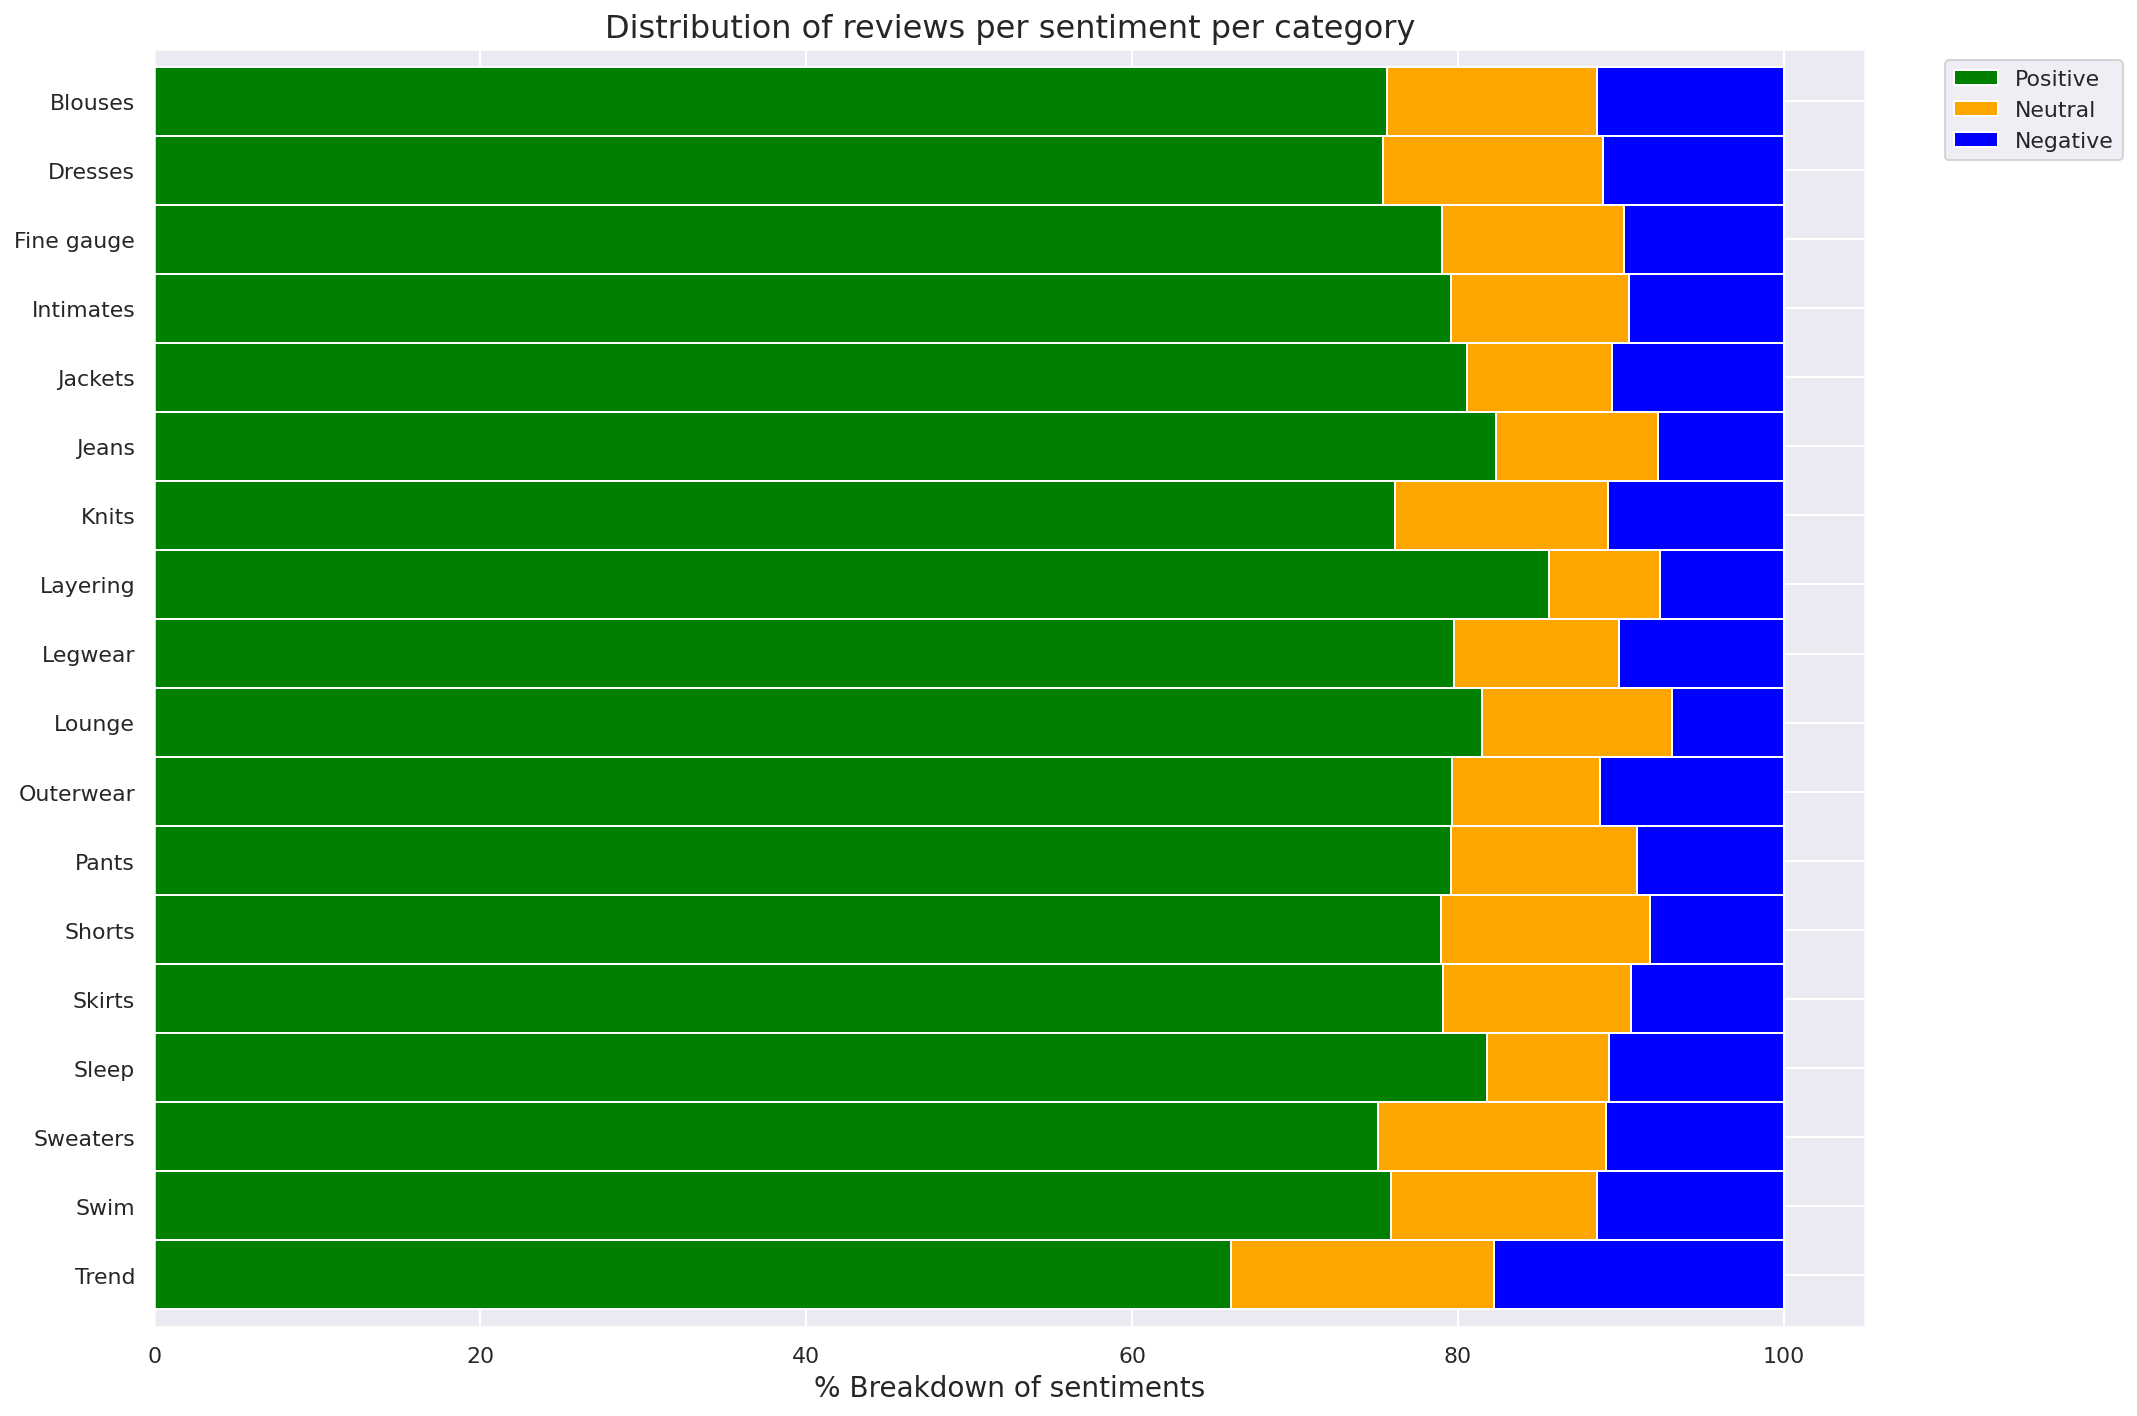

In [57]:
categories = df_distribution_pct.index
plt.figure(figsize=(10,5))

df_distribution_pct.plot(kind="barh", 
                         stacked=True, 
                         edgecolor='white',
                         width=1.0,
                         color=['green', 
                                'orange', 
                                'blue'])
plt.title("Distribution of reviews per sentiment per category", 
          fontsize='16')
plt.legend(bbox_to_anchor=(1.04,1), 
           loc="upper left",
           labels=['Positive', 
                   'Neutral', 
                   'Negative'])
plt.xlabel("% Breakdown of sentiments", fontsize='14')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('distribution_sentiment_per_category.png', dpi=300)
plt.show()

In [58]:
sess.upload_data(path='distribution_sentiment_per_category.png', bucket=bucket, key_prefix="images")

's3://sagemaker-us-east-1-496902025774/images/distribution_sentiment_per_category.png'

In [59]:
statement_num_words = """
    SELECT CARDINALITY(SPLIT(review_body, ' ')) as num_words
    FROM {}
""".format(table_name)

print(statement_num_words)


    SELECT CARDINALITY(SPLIT(review_body, ' ')) as num_words
    FROM reviews



In [60]:
df_num_words = wr.athena.read_sql_query(
    sql=statement_num_words,
    database=database_name
)

In [61]:
df_num_words

,num_words
0,70
1,68
2,102
3,27
4,36
...,...
22621,28
22622,40
22623,44
22624,90


In [62]:
summary = df_num_words["num_words"].describe(percentiles=[0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
summary

count    22626.000000
mean        62.709847
std         29.993735
min          2.000000
10%         22.000000
20%         33.000000
30%         42.000000
40%         51.000000
50%         61.000000
60%         72.000000
70%         86.000000
80%         97.000000
90%        103.000000
100%       122.000000
max        122.000000
Name: num_words, dtype: float64

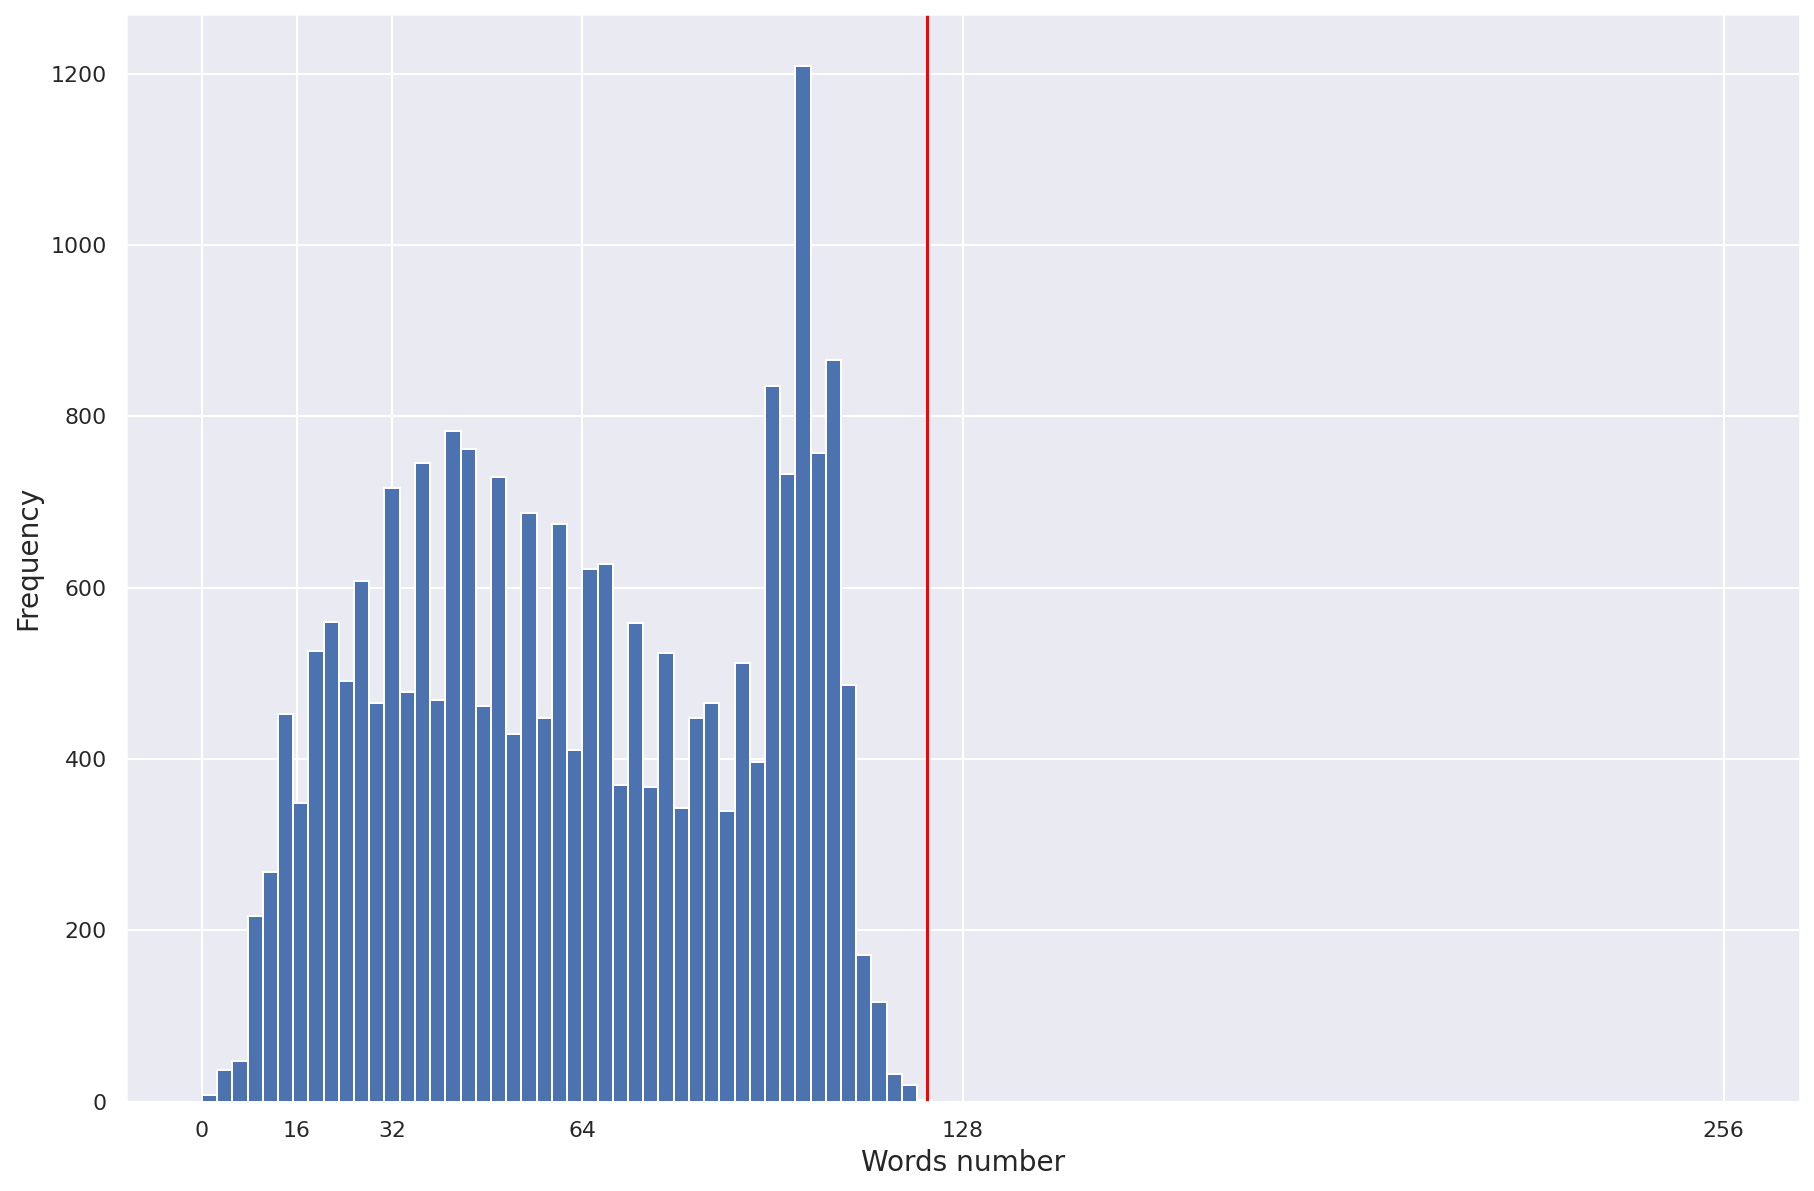

In [63]:
df_num_words["num_words"].plot.hist(xticks=[0, 16, 32, 64, 128, 256], bins=100, range=[0, 256]).axvline(
    x=summary["100%"], c="red"
)

plt.xlabel("Words number", fontsize='14')
plt.ylabel("Frequency", fontsize='14')
plt.savefig('distribution_num_words_per_review.png', dpi=300)
plt.show()

In [64]:
sess.upload_data(path='distribution_num_words_per_review.png', bucket=bucket, key_prefix="images")

's3://sagemaker-us-east-1-496902025774/images/distribution_num_words_per_review.png'